In [25]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib.ticker as mtick 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

> ### Veri Kaynağı: https://www.kaggle.com/datasets/shreyasvedpathak/pcos-dataset

In [26]:
data = pd.read_csv("../SistersLab-Project/PCOS_data.csv")

 |**Feature No**|**FEATURE**|**DESCRIPTION**|
 |---|---|---|
 0   |Sl. No | Seri Numarası
 1   |Patient File No. | Hasta dosya numarası 
 2   |PCOS (Y/N) | PCOS sendromunun olup olmaması
 3   |Age (yrs) | Yaş  
 4   |Weight (Kg) | Kilo       
 5   |Height(Cm) | Boy             
 6   |BMI | Vücut Kitle İndeksi                    
 7   |Blood Group | Kan grubu: A+=11, A-=12, B+=13, B-=14, O+=15, O-=16, AB+=17, AB-=18|            
 8   |Pulse rate(bpm) | Kalp atış hızı        
 9   |RR (breaths/min) | Solunum hızı     
 10  |Hb(g/dl) | Hemoglobin               
 11  |Cycle(R/I) | Menstrüal döngüsünün düzenli olup olmadığı          
 12  |Cycle length(days) | Menstrüal döngü uzunluğu       
 13  |Marriage Status (Yrs) | Yıl cinsinden evlilik durumu
 14  |Pregnant(Y/N) | Hamile olup olmadığı            
 15  |No. of abortions | Kürtaj sayısı         
 16  |I beta-HCG(mIU/mL) | Beta-HCG seviyesi 
 17  |II beta-HCG(mIU/mL) | ?????? | 
 18  |FSH(mIU/mL) | FSH seviyesi              
 19  |LH(mIU/mL) | LH seviyesi       
 20  |FSH/LH | FSH/LH oranı                
 21  |Hip(inch) | Kalça             
 22  |Waist(inch) | Bel              
 23  |Waist:Hip Ratio | Bel/Kalça oranı         
 24  |TSH (mIU/L) | Tiroit Stimülan Hormon    
 25  |AMH(ng/mL) | Anti Müllerian Hormonu         
 26  |PRL(ng/mL) | Prolaktin Hormonu               
 27  |Vit D3 (ng/mL) | D Vitamini seviyesi          
 28  |PRG(ng/mL) | Progesteron Hormonu              
 29  |RBS(mg/dl) | Rastgele bir zamanda kan şekeri seviyesi              
 30  |Weight gain(Y/N) | Kilo alımı 
 31  |hair growth(Y/N) | Saç uzaması         
 32  |Skin darkening (Y/N) | Cilt kararması     
 33  |Hair loss(Y/N) | Saç kaybı       
 34  |Pimples(Y/N) | Sivilce         
 35  |Fast food (Y/N) | Fast Food tüketilip tüketilmediği         
 36  |Reg.Exercise(Y/N) | Düzenli egzersiz yapılıp yapılmadığı      
 37  |BP _Systolic (mmHg) | 120-129 mm Hg      
 38  |BP _Diastolic (mmHg) | <80 mm Hg    
 39  |Follicle No. (L) | Folikül sayısı-Sol   
 40  |Follicle No. (R) | Folikül sayısı-Sağ   
 41  |Avg. F size (L) (mm) | Ortalama folikül boyutu-Sol   
 42  |Avg. F size (R) (mm) | Ortalama folikül boyutu-Sağ    
 43  |Endometrium (mm) | Rahim kalınlığı         
 44  |Unnamed: 44 | İsimsiz sütun 

In [27]:
data.sample(4)

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
51       52                52           0          23         54.0   
525     526               526           0          27         48.0   
252     253               253           1          47         62.7   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
51       158.000  21.6           16                72                18   
525      158.496  19.1           13                72                18   
252      154.000  26.4           15                72                18   
540      165.000  30.1           13                80                20   

     Hb(g/dl)  Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  \
51       10.8           2                   5                    2.0   
525      10.7           2                   5                    2.0   
252      10.0           4                   4                   30.0   
540      10.2           4                   7                    2.0   

     Pregnant(Y/N)  No. of abortions    I   beta-HCG(mIU/mL)  \
51               1                 0                  177.57   
525              0                 0                    1.99   
252              1                 2                25000.00   
540              0                 0                    1.99   

    II    beta-HCG(mIU/mL)  FSH(mIU/mL)  LH(mIU/mL)  FSH/LH  Hip(inch)  \
51                  177.57         5.32        1.80    2.96         38   
525                   1.99         8.95        4.61    1.94         26   
252                  25000         1.88        0.25    7.52         38   
540                   1.99         3.99        4.30    0.93         48   

     Waist(inch)  Waist:Hip Ratio  TSH (mIU/L) AMH(ng/mL)  PRL(ng/mL)  \
51            32             0.84         5.17        2.1       24.50   
525           24             0.92         4.27        0.6       19.46   
252           36             0.95         2.47        6.2       31.47   
540           46             0.96         1.66         20       20.74   

     Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  Weight gain(Y/N)  \
51             14.0        0.25        70.0                 0   
525            24.3        0.25       100.0                 0   
252            12.1        0.25        92.0                 1   
540            17.4        0.37       108.0                 1   

     hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  Pimples(Y/N)  \
51                  0                     0               0             0   
525                 1                     0               0             0   
252                 1                     1               1             0   
540                 1                     1               1             1   

     Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
51               0.0                  0                  100   
525              0.0                  0                  110   
252              0.0                  0                  110   
540              1.0                  0                  120   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
51                     70                 7                10   
525                    70                 2                 3   
252                    80                14                11   
540                    70                 9                10   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm) Unnamed: 44  
51                   15.0                  13.0              10.0         NaN  
525                  16.0                  19.0               7.8         NaN  
252                  16.0                  19.0               9.3         NaN  
540                  19.0                  18.0               6.9         NaN

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [29]:
data.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [41]:
df = data.drop(["Sl. No", "Patient File No.",  "Unnamed: 44"], axis=1)

In [42]:
df["PCOS (Y/N)"].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

### Kolon isimlerinde düzenleme yaptım. Boşluklar rahatsız ediciydi.

In [43]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [45]:
df.rename(columns={'Height(Cm) ': 'Height(Cm)'}, inplace=True)
df.rename(columns={'Marraige Status (Yrs)': 'Marriage Status (Yrs)'}, inplace=True)
df.rename(columns={'Pulse rate(bpm) ': 'Pulse rate(bpm)'}, inplace=True)
df.rename(columns={'II    beta-HCG(mIU/mL)': 'II_beta_HCG(mIU/mL)'}, inplace=True)
df.rename(columns={' Age (yrs)': 'Age (yrs)'}, inplace=True)
df.rename(columns={'  I   beta-HCG(mIU/mL)': 'I_beta_HCG(mIU/mL)'}, inplace=True)

df.rename(columns={'No. of abortions': 'No_of_abortions'}, inplace=True)
df.rename(columns={'BP _Systolic (mmHg)': 'BP_Systolic(mmHg)'}, inplace=True)

df.rename(columns={'BP _Diastolic (mmHg)': 'BP_Diastolic(mmHg)'}, inplace=True)
df.rename(columns={'Waist:Hip Ratio': 'WaistHip_Ratio'}, inplace=True)

#### Normalde int/float olması gereken sütunların object olduğunu gördüm bunları sayısal değerlere çevirmek istedim.
* Burada '1.99.' şeklinde yazılmış str ifade olduğu için bunu ayrı düzenledim.

In [46]:
df[df["II_beta_HCG(mIU/mL)"] == '1.99.'] 

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
123           1         23         40.0       150.0  17.8           15   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
123               74                18      10.8           2   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
123                   5                    2.0              0   

     No_of_abortions  I_beta_HCG(mIU/mL) II_beta_HCG(mIU/mL)  FSH(mIU/mL)  \
123                0                1.99               1.99.          5.0   

     LH(mIU/mL)  FSH/LH  Hip(inch)  Waist(inch)  WaistHip_Ratio  TSH (mIU/L)  \
123        5.15    0.97         46           38            0.83         1.69   

    AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
123       19.8       15.23            23.5        0.93        92.0   

     Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
123                 1                 1                     1               1   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP_Systolic(mmHg)  \
123             0              1.0                  1                100   

     BP_Diastolic(mmHg)  Follicle No. (L)  Follicle No. (R)  \
123                  70                10                13   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
123                  18.0                  17.0              12.5

In [47]:
df.loc[df['II_beta_HCG(mIU/mL)'] == '1.99.', 'II_beta_HCG(mIU/mL)'] = 1.99

In [48]:
df[df["II_beta_HCG(mIU/mL)"] == '1.99.'] # kontrol ettim tekrar

Empty DataFrame
Columns: [PCOS (Y/N), Age (yrs), Weight (Kg), Height(Cm), BMI, Blood Group, Pulse rate(bpm), RR (breaths/min), Hb(g/dl), Cycle(R/I), Cycle length(days), Marriage Status (Yrs), Pregnant(Y/N), No_of_abortions, I_beta_HCG(mIU/mL), II_beta_HCG(mIU/mL), FSH(mIU/mL), LH(mIU/mL), FSH/LH, Hip(inch), Waist(inch), WaistHip_Ratio, TSH (mIU/L), AMH(ng/mL), PRL(ng/mL), Vit D3 (ng/mL), PRG(ng/mL), RBS(mg/dl), Weight gain(Y/N), hair growth(Y/N), Skin darkening (Y/N), Hair loss(Y/N), Pimples(Y/N), Fast food (Y/N), Reg.Exercise(Y/N), BP_Systolic(mmHg), BP_Diastolic(mmHg), Follicle No. (L), Follicle No. (R), Avg. F size (L) (mm), Avg. F size (R) (mm), Endometrium (mm)]
Index: []

#### Modeli çalıştırınca bir sütunda 'a' değeri olduğuna dair bir hata aldım. Bunun yerini tespit ettim.

In [49]:
df[df.index == 305]

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
305           0         37         56.0       152.0  24.2           13   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
305               74                20      11.7           2   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
305                   5                    9.0              0   

     No_of_abortions  I_beta_HCG(mIU/mL) II_beta_HCG(mIU/mL)  FSH(mIU/mL)  \
305                0                42.0                1.99         2.91   

     LH(mIU/mL)  FSH/LH  Hip(inch)  Waist(inch)  WaistHip_Ratio  TSH (mIU/L)  \
305        0.35    8.31         35           33            0.94         16.0   

    AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
305          a        2.22            38.6         0.3       100.0   

     Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
305                 0                 0                     0               0   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP_Systolic(mmHg)  \
305             1              0.0                  1                120   

     BP_Diastolic(mmHg)  Follicle No. (L)  Follicle No. (R)  \
305                  70                 4                 5   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
305                  17.0                  16.0               5.6

In [50]:
df.loc[df['AMH(ng/mL)'] == 'a', 'AMH(ng/mL)'] = np.nan # eksik değer

In [51]:
df[df.index == 305] # kontrol ettim

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
305           0         37         56.0       152.0  24.2           13   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
305               74                20      11.7           2   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
305                   5                    9.0              0   

     No_of_abortions  I_beta_HCG(mIU/mL) II_beta_HCG(mIU/mL)  FSH(mIU/mL)  \
305                0                42.0                1.99         2.91   

     LH(mIU/mL)  FSH/LH  Hip(inch)  Waist(inch)  WaistHip_Ratio  TSH (mIU/L)  \
305        0.35    8.31         35           33            0.94         16.0   

    AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
305        NaN        2.22            38.6         0.3       100.0   

     Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
305                 0                 0                     0               0   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP_Systolic(mmHg)  \
305             1              0.0                  1                120   

     BP_Diastolic(mmHg)  Follicle No. (L)  Follicle No. (R)  \
305                  70                 4                 5   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
305                  17.0                  16.0               5.6

#### gerekli düzenlemelerden sonra object>>float64 çevirmeleri yapıldı

In [52]:
df['II_beta_HCG(mIU/mL)'] = pd.to_numeric(df['II_beta_HCG(mIU/mL)'], errors='coerce').astype('float64')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce').astype('float64')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1   Age (yrs)              541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marriage Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No_of_abortions        541 non-null    int64  
 14  I_beta_HCG(mIU/mL)     541 non-null    float64
 15  II_bet

In [54]:
df[df["AMH(ng/mL)"]>=5]

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
2             1         33         68.8     165.000  25.3           11   
5             0         36         74.1     165.000  27.2           15   
12            1         25         74.0     152.000  32.0           17   
53            0         32         62.0     151.000  27.2           15   
66            0         41         56.0     160.000  21.9           13   
67            0         35         62.0     152.000  26.8           16   
72            0         36         65.0     154.000  27.4           15   
74            0         35         59.0     152.000  25.5           13   
80            0         36         57.6     151.000  25.3           11   
82            0         39         52.0     161.000  20.1           11   
89            0         36         65.0     151.000  28.5           15   
96            1         28         67.5     154.000  28.5           16   
102           1         38         64.3     149.000  29.0           11   
107           1         27         54.0     156.000  22.2           13   
108           1         24         53.0     149.000  23.9           15   
109           0         34         80.0     160.000  31.3           15   
110           0         21         59.0     150.000  26.2           15   
113           1         32         63.0     164.000  23.4           17   
114           1         29         74.0     162.000  28.2           15   
117           1         28         68.0     155.000  28.3           13   
118           0         33         83.0     162.000  31.6           13   
122           1         22         79.0     155.000  32.9           11   
123           1         23         40.0     150.000  17.8           15   
124           1         26         78.0     159.000  30.9           13   
127           0         42         48.0     148.000  21.9           11   
130           1         24         89.0     173.000  29.7           17   
131           0         25         53.4     159.000  21.1           11   
132           1         22         60.0     154.000  25.3           15   
133           1         28         70.0     157.000  28.4           15   
136           0         26         60.0     153.000  25.6           13   
139           0         35         65.0     154.000  27.4           15   
141           1         28         57.0     158.000  22.8           15   
142           1         30         69.0     158.000  27.6           13   
144           0         37         68.0     153.000  29.0           15   
150           1         28         63.0     162.000  24.0           15   
151           1         29         56.4     150.000  25.1           13   
152           1         31         60.0     156.000  24.7           13   
153           1         29         52.0     147.000  24.1           11   
154           0         26         40.0     152.400  17.2           11   
155           0         26         49.3     158.000  19.7           15   
156           0         27         53.2     158.000  21.3           13   
158           1         25         60.0     151.000  26.3           15   
169           1         33         59.6     163.000  22.4           11   
175           1         27         58.0     152.000  25.1           15   
176           1         28         78.0     158.000  31.2           16   
177           1         24         89.0     173.000  29.7           17   
178           1         37         88.0     168.000  31.2           12   
180           1         30         70.0     150.000  31.1           16   
184           0         26         60.0     164.500  22.2           14   
189           1         23         58.0     159.000  22.9           15   
190           0         34         54.0     153.000  23.1           13   
191           1         29         63.0     153.000  26.9           17   
192           0         30         67.0     167.000  24.0           12   
194      

In [55]:
df.quantile([0, 0.8, 0.9, 0.97, 0.98, 0.99, 1]).T

0.00    0.80    0.90      0.97       0.98  \
PCOS (Y/N)               0.000    1.00    1.00     1.000     1.0000   
Age (yrs)               20.000   36.00   38.00    42.000    44.0000   
Weight (Kg)             31.000   68.00   74.00    83.000    85.0000   
Height(Cm)             137.000  161.50  164.50   169.800   170.1376   
BMI                     12.400   27.40   29.20    32.000    32.9000   
Blood Group             11.000   15.00   16.00    17.000    17.0000   
Pulse rate(bpm)         13.000   74.00   78.00    80.000    80.0000   
RR (breaths/min)        16.000   20.00   22.00    22.000    24.0000   
Hb(g/dl)                 8.500   12.00   12.40    13.160    13.2000   
Cycle(R/I)               2.000    4.00    4.00     4.000     4.0000   
Cycle length(days)       0.000    6.00    6.00     8.800     9.0000   
Marriage Status (Yrs)    0.000   12.00   14.00    18.000    19.2200   
Pregnant(Y/N)            0.000    1.00    1.00     1.000     1.0000   
No_of_abortions          0.000    0.00    1.00     2.000     3.0000   
I_beta_HCG(mIU/mL)       1.300  375.18  658.29  2043.480  5764.6700   
II_beta_HCG(mIU/mL)      0.990  158.51  403.85   785.432  1093.1360   
FSH(mIU/mL)              0.210    6.73    7.78    10.010    11.2200   
LH(mIU/mL)               0.020    4.11    5.57     8.658     9.5740   
FSH/LH                   0.000    4.87    7.33    17.580    21.3680   
Hip(inch)               26.000   41.00   42.00    45.000    46.0000   
Waist(inch)             24.000   36.00   38.00    41.000    42.0000   
WaistHip_Ratio           0.760    0.94    0.95     0.968     0.9700   
TSH (mIU/L)              0.040    3.90    5.00     8.094    10.9040   
AMH(ng/mL)               0.100    8.55   12.71    19.249    20.5320   
PRL(ng/mL)               0.400   32.06   40.43    54.876    63.5340   
Vit D3 (ng/mL)           0.000   36.85   45.60    59.824    62.1000   
PRG(ng/mL)               0.047    0.49    0.66     0.980     1.0000   
RBS(mg/dl)              60.000  108.00  116.00   133.000   138.0000   
Weight gain(Y/N)         0.000    1.00    1.00     1.000     1.0000   
hair growth(Y/N)         0.000    1.00    1.00     1.000     1.0000   
Skin darkening (Y/N)     0.000    1.00    1.00     1.000     1.0000   
Hair loss(Y/N)           0.000    1.00    1.00     1.000     1.0000   
Pimples(Y/N)             0.000    1.00    1.00     1.000     1.0000   
Fast food (Y/N)          0.000    1.00    1.00     1.000     1.0000   
Reg.Exercise(Y/N)        0.000    1.00    1.00     1.000     1.0000   
BP_Systolic(mmHg)       12.000  120.00  120.00   120.000   120.0000   
BP_Diastolic(mmHg)       8.000   80.00   80.00    80.000    80.0000   
Follicle No. (L)         0.000   10.00   12.00    15.000    16.0000   
Follicle No. (R)         0.000   10.00   12.00    16.000    18.0000   
Avg. F size (L) (mm)     0.000   18.00   19.00    20.000    20.0000   
Avg. F size (R) (mm)     0.000   18.00   19.00    20.000    21.0000   
Endometrium (mm)         0.000   10.00   11.00    13.000    13.6000   

                            0.99      1.00  
PCOS (Y/N)                 1.000      1.00  
Age (yrs)                 45.000     48.00  
Weight (Kg)               89.000    108.00  
Height(Cm)               172.000    180.00  
BMI                       35.500     38.90  
Blood Group               17.000     18.00  
Pulse rate(bpm)           80.000     82.00  
RR (breaths/min)          24.000     28.00  
Hb(g/dl)                  13.800     14.80  
Cycle(R/I)                 4.000      5.00  
Cycle length(days)        11.000     12.00  
Marriage Status (Yrs)     23.000     30.00  
Pregnant(Y/N)              1.000      1.00  
No_of_abortions            3.000      5.00  
I_beta_HCG(mIU/mL)     23790.916  32460.97  
II_beta_HCG(mIU/mL)     3675.912  25000.00  
FSH(mIU/mL)               15.266   5052.00  
LH(mIU/mL)                10.650   2018.00  
FSH/LH                    31.212   1372.83  
Hip(inch)                 48.000     48.00  
Waist(inch)               4

----------

### Visualization

<Axes: xlabel='Age (yrs)', ylabel='Marriage Status (Yrs)'>

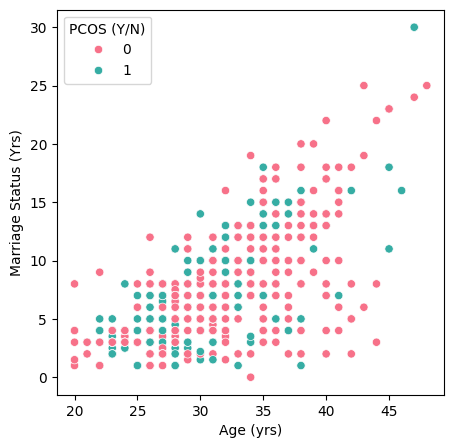

In [41]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="Age (yrs)", y="Marriage Status (Yrs)", data=df, hue='PCOS (Y/N)', palette='husl')

In [42]:
df[df["Age (yrs)"] <= 22]

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
10            0         20         71.0     163.000  26.7           15   
27            0         20         68.0     152.000  29.4           17   
39            0         20         74.0     171.000  25.3           13   
88            1         22         69.5     168.000  24.6           13   
95            1         22         50.0     155.000  20.8           15   
110           0         21         59.0     150.000  26.2           15   
122           1         22         79.0     155.000  32.9           11   
132           1         22         60.0     154.000  25.3           15   
231           0         22         78.0     154.000  32.9           15   
239           0         20         56.0     159.000  22.2           13   
297           0         20         52.0     150.000  23.1           15   
336           1         21         82.0     158.000  32.8           16   
350           0         22         56.0     154.000  23.6           13   
367           0         20         64.0     165.000  23.5           15   
368           1         22         58.0     161.000  22.4           13   
513           0         21         55.0     158.496  21.9           16   
527           0         22         62.0     162.000  23.6           15   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
10                80                20      10.0           2   
27                72                20      10.0           4   
39                74                16      11.1           4   
88                74                20      12.5           4   
95                80                20      12.1           2   
110               72                18      11.2           4   
122               72                18      11.3           2   
132               70                18      12.7           2   
231               72                18      12.4           2   
239               72                18      12.4           2   
297               72                18      10.5           2   
336               78                24      10.6           4   
350               72                18      10.8           2   
367               72                18      11.5           2   
368               74                22      10.0           4   
513               72                18      11.5           2   
527               74                22      11.1           2   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
10                    5                    4.0              1   
27                    3                    4.0              1   
39                    0                    1.0              0   
88                    2                    3.0              0   
95                    5                    1.0              1   
110                   6                    2.0              1   
122                   5                    4.0              0   
132                   5                    4.0              0   
231                   5                    9.0              0   
239                   5                    1.5              1   
297                   6                    3.0              0   
336                   3                    3.0              1   
350                   6                    1.0              1   
367                   6                    8.0              1   
368                   3                    5.0              1   
513                   5                    3.0              0   
527                   4                    3.0              0   

     No. of abortions  I beta-HCG(mIU/mL)  II beta-HCG(mIU/mL)  FSH(mIU/mL)  \
10                  2              158.51               158.51         4.89   
27                  0              689.58                11.24         1.80   
39                  0                1.99                 1.99         3.52   
88                  0           

In [43]:
df[df["I beta-HCG(mIU/mL)"] >= df["I beta-HCG(mIU/mL)"].quantile(0.99)]

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
110           0         21         59.0       150.0  26.2           15   
111           0         26         75.0       170.0  26.0           15   
214           0         29         63.0       152.0  27.3           11   
252           1         47         62.7       154.0  26.4           15   
446           0         29         63.0       162.0  24.0           11   
447           1         47         62.7       160.0  24.5           15   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
110               72                18      11.2           4   
111               72                18      11.2           4   
214               72                18      13.2           2   
252               72                18      10.0           4   
446               72                18      13.2           2   
447               72                18      10.0           4   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
110                   6                    2.0              1   
111                   2                    3.0              1   
214                   6                   11.0              1   
252                   4                   30.0              1   
446                   5                   11.0              0   
447                   7                   30.0              0   

     No. of abortions  I beta-HCG(mIU/mL)  II beta-HCG(mIU/mL)  FSH(mIU/mL)  \
110                 0            26290.26              3350.19         4.13   
111                 0            32460.97                97.63         6.21   
214                 4            25000.00               475.04         1.99   
252                 2            25000.00             25000.00         1.88   
446                 0            30004.00               475.04         1.99   
447                 0            30007.00                 1.99         1.88   

     LH(mIU/mL)  FSH/LH  Hip(inch)  Waist(inch)  Waist:Hip Ratio  TSH (mIU/L)  \
110        5.11    0.81         41           34             0.83         1.26   
111        2.18    2.85         40           34             0.85         2.44   
214        1.61    1.24         38           34             0.89         1.77   
252        0.25    7.52         38           36             0.95         2.47   
446        1.61    1.24         39           37             0.95         1.77   
447        0.25    7.52         39           36             0.92         2.47   

     AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
110       21.90       13.97            33.4        1.00       125.0   
111        1.60       21.48            25.3        0.28       100.0   
214        5.96       21.95            22.7        0.46        95.0   
252        6.20       31.47            12.1        0.25        92.0   
446        5.96       21.95            22.7        0.46        95.0   
447        6.20       31.47            12.1        0.25        92.0   

     Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
110                 0                 0                     1               1   
111                 0                 1                     1               1   
214                 1                 0                     0               1   
252                 1                 1                     1               1   
446                 0                 1                     1               0   
447                 0                 0                     0               0   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
110             0              0.0                  1                  100   
111             0              1.0                  1                  120   
214             1              1.0                  0                  110   
252             0              0.0                  0                  110   
446

<Axes: xlabel='Age (yrs)', ylabel='No. of abortions'>

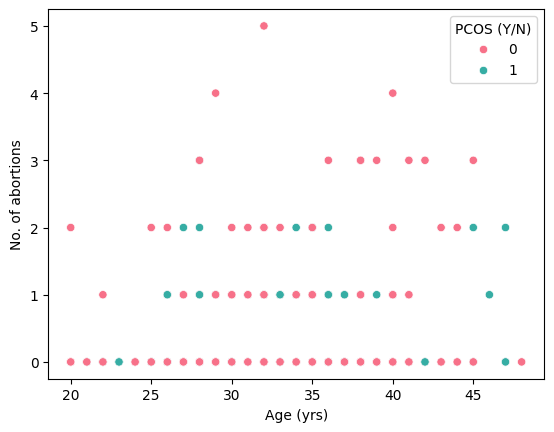

In [44]:
sns.scatterplot(x="Age (yrs)", y="No. of abortions", data=df, hue='PCOS (Y/N)', palette='husl')

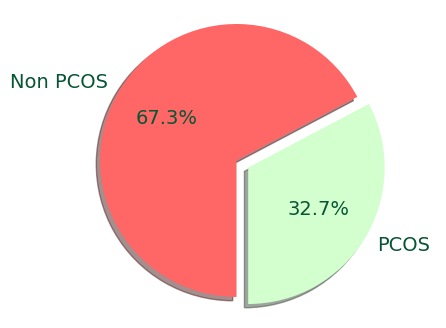

In [47]:
PCOS=df[df['PCOS (Y/N)']==1].shape[0]
non_PCOS= df[df['PCOS (Y/N)']==0].shape[0]

slices=[PCOS,non_PCOS]
labels=['PCOS','Non PCOS']
explode=[0.1,0]

colors = ['#d3ffce', '#ff6666']
#794044  #065535

fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(slices, explode=explode,colors= colors, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270,textprops={'fontsize': 14,'color':"#065535"})
ax1.axis('equal')  
plt.show()

In [48]:
df.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [49]:
weight = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==0) & (df["Hair loss(Y/N)"]==0)] # 100
skin = df[(df["Weight gain(Y/N)"]==0) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==0)] # 010
weight_skin = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==0)] # 110

hairLoss = df[(df["Weight gain(Y/N)"]==0) & (df["Skin darkening (Y/N)"]==0) & (df["Hair loss(Y/N)"]==1)] # 001
weight_hairLoss = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==0) & (df["Hair loss(Y/N)"]==1)] # 101
skin_hairLoss = df[(df["Weight gain(Y/N)"]==0) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==1)] # 011

all_3 = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==1)] # 111

In [50]:
weight.shape, skin.shape, hairLoss.shape

((41, 42), (37, 42), (96, 42))

In [51]:
weight_skin.shape, weight_hairLoss.shape, skin_hairLoss.shape, all_3.shape

((38, 42), (58, 42), (24, 42), (67, 42))

In [52]:
df_subsets = [weight, skin, weight_skin, hairLoss, weight_hairLoss, skin_hairLoss, all_3]
sizes=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])

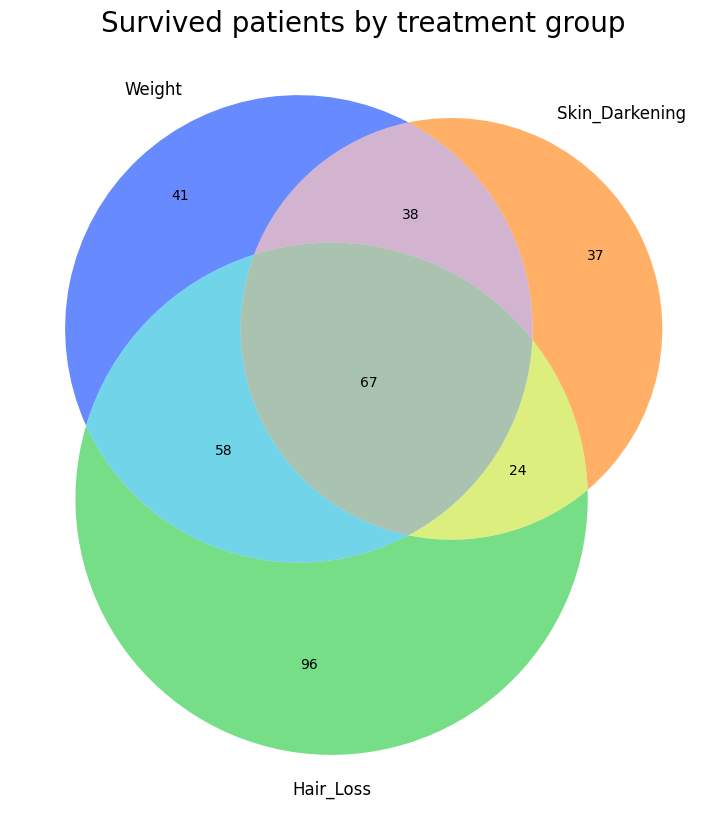

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
v = venn3(subsets=sizes, set_labels=("Weight", "Skin_Darkening ", "Hair_Loss"), ax=ax, alpha=0.6, set_colors= sns.color_palette("bright"))

for text in v.set_labels:
    text.set_fontsize(12)
    
ax.set_title("Survived patients by treatment group", size=20)
plt.show()

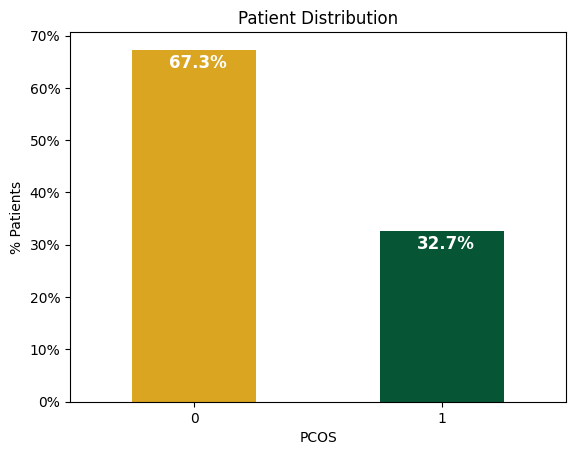

In [54]:
colors = ['#daa520','#065535']
ax = (df['PCOS (Y/N)'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('PCOS')
ax.set_ylabel('% Patients')
ax.set_title('Patient Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

<Axes: xlabel='PCOS (Y/N)', ylabel='count'>

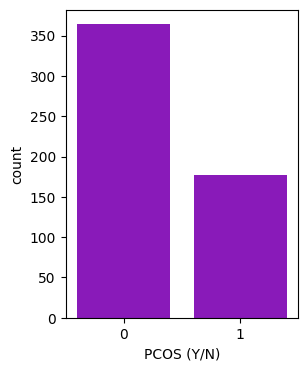

In [56]:
plt.figure(figsize=(3,4))
sns.countplot(data=df, x='PCOS (Y/N)', color="darkviolet")
#plt.xticks(rotation=90)

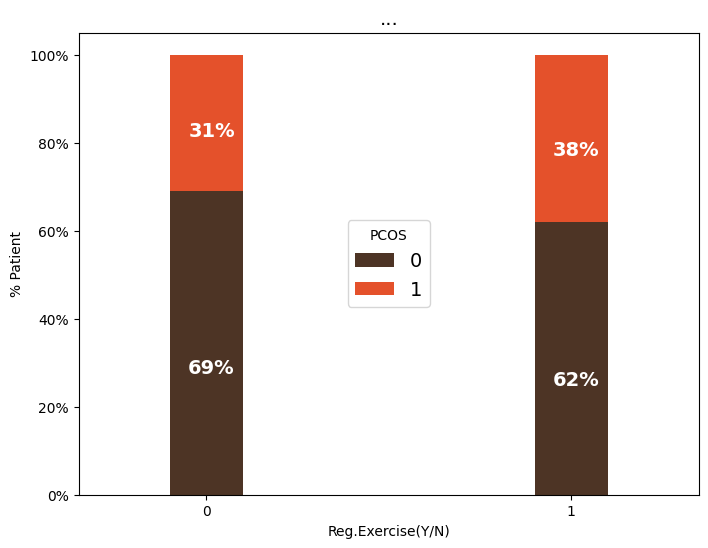

In [57]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Reg.Exercise(Y/N)','PCOS (Y/N)']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'PCOS')
ax.set_ylabel('% Patient')
ax.set_title('...',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

<Figure size 0x1000 with 0 Axes>

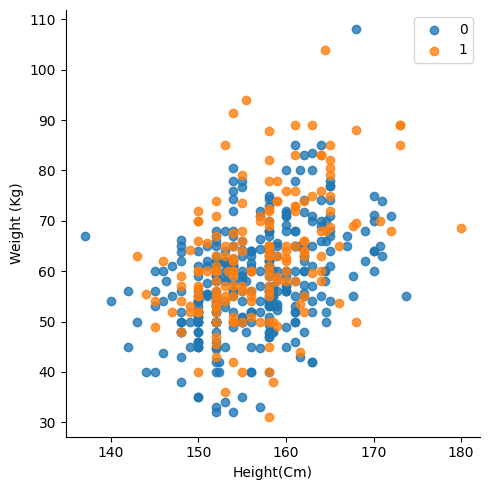

In [58]:
plt.figure(figsize=(0,10))
sns.lmplot(x="Height(Cm)", y="Weight (Kg)", data=df, fit_reg=False, hue='PCOS (Y/N)', legend=False)
plt.legend(loc='upper right')
plt.show()

<Figure size 0x1000 with 0 Axes>

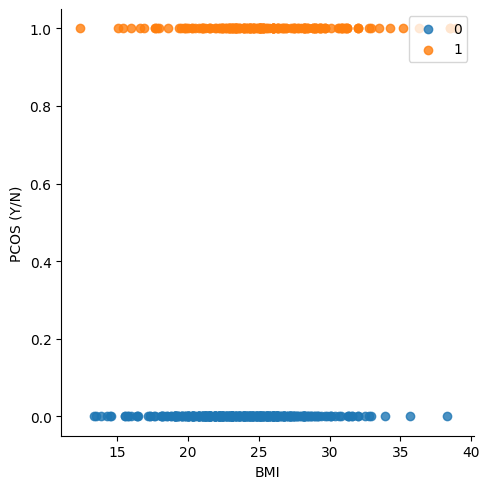

In [59]:
plt.figure(figsize=(0,10))
sns.lmplot(x="BMI", y="PCOS (Y/N)", data=df, fit_reg=False, hue="PCOS (Y/N)", legend=False)
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Distribution of FSH by PCOS')

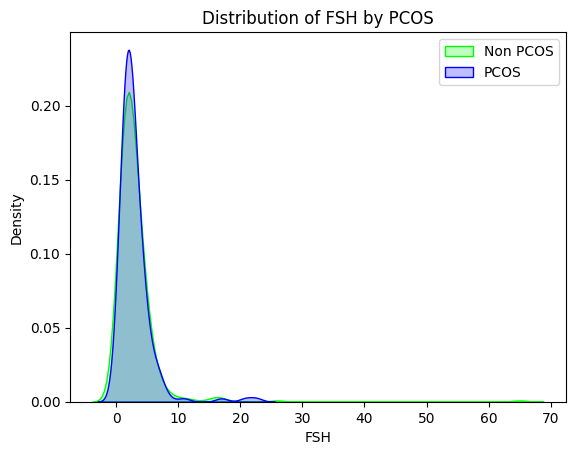

In [71]:
ax = sns.kdeplot(df["TSH (mIU/L)"][(df['PCOS (Y/N)'] == 0)], color="Lime", shade = True)
ax = sns.kdeplot(df["TSH (mIU/L)"][(df['PCOS (Y/N)'] == 1)], ax =ax, color="Blue", shade= True)
ax.legend(["Non PCOS","PCOS"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('FSH')
ax.set_title('Distribution of FSH by PCOS')

In [ ]:
selected_columns = ["BMI", "Cycle length(days)", 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)',
       'Waist(inch)', 'WaistHip_Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)',
       'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)','BP_Systolic(mmHg)', 'BP_Diastolic(mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)']

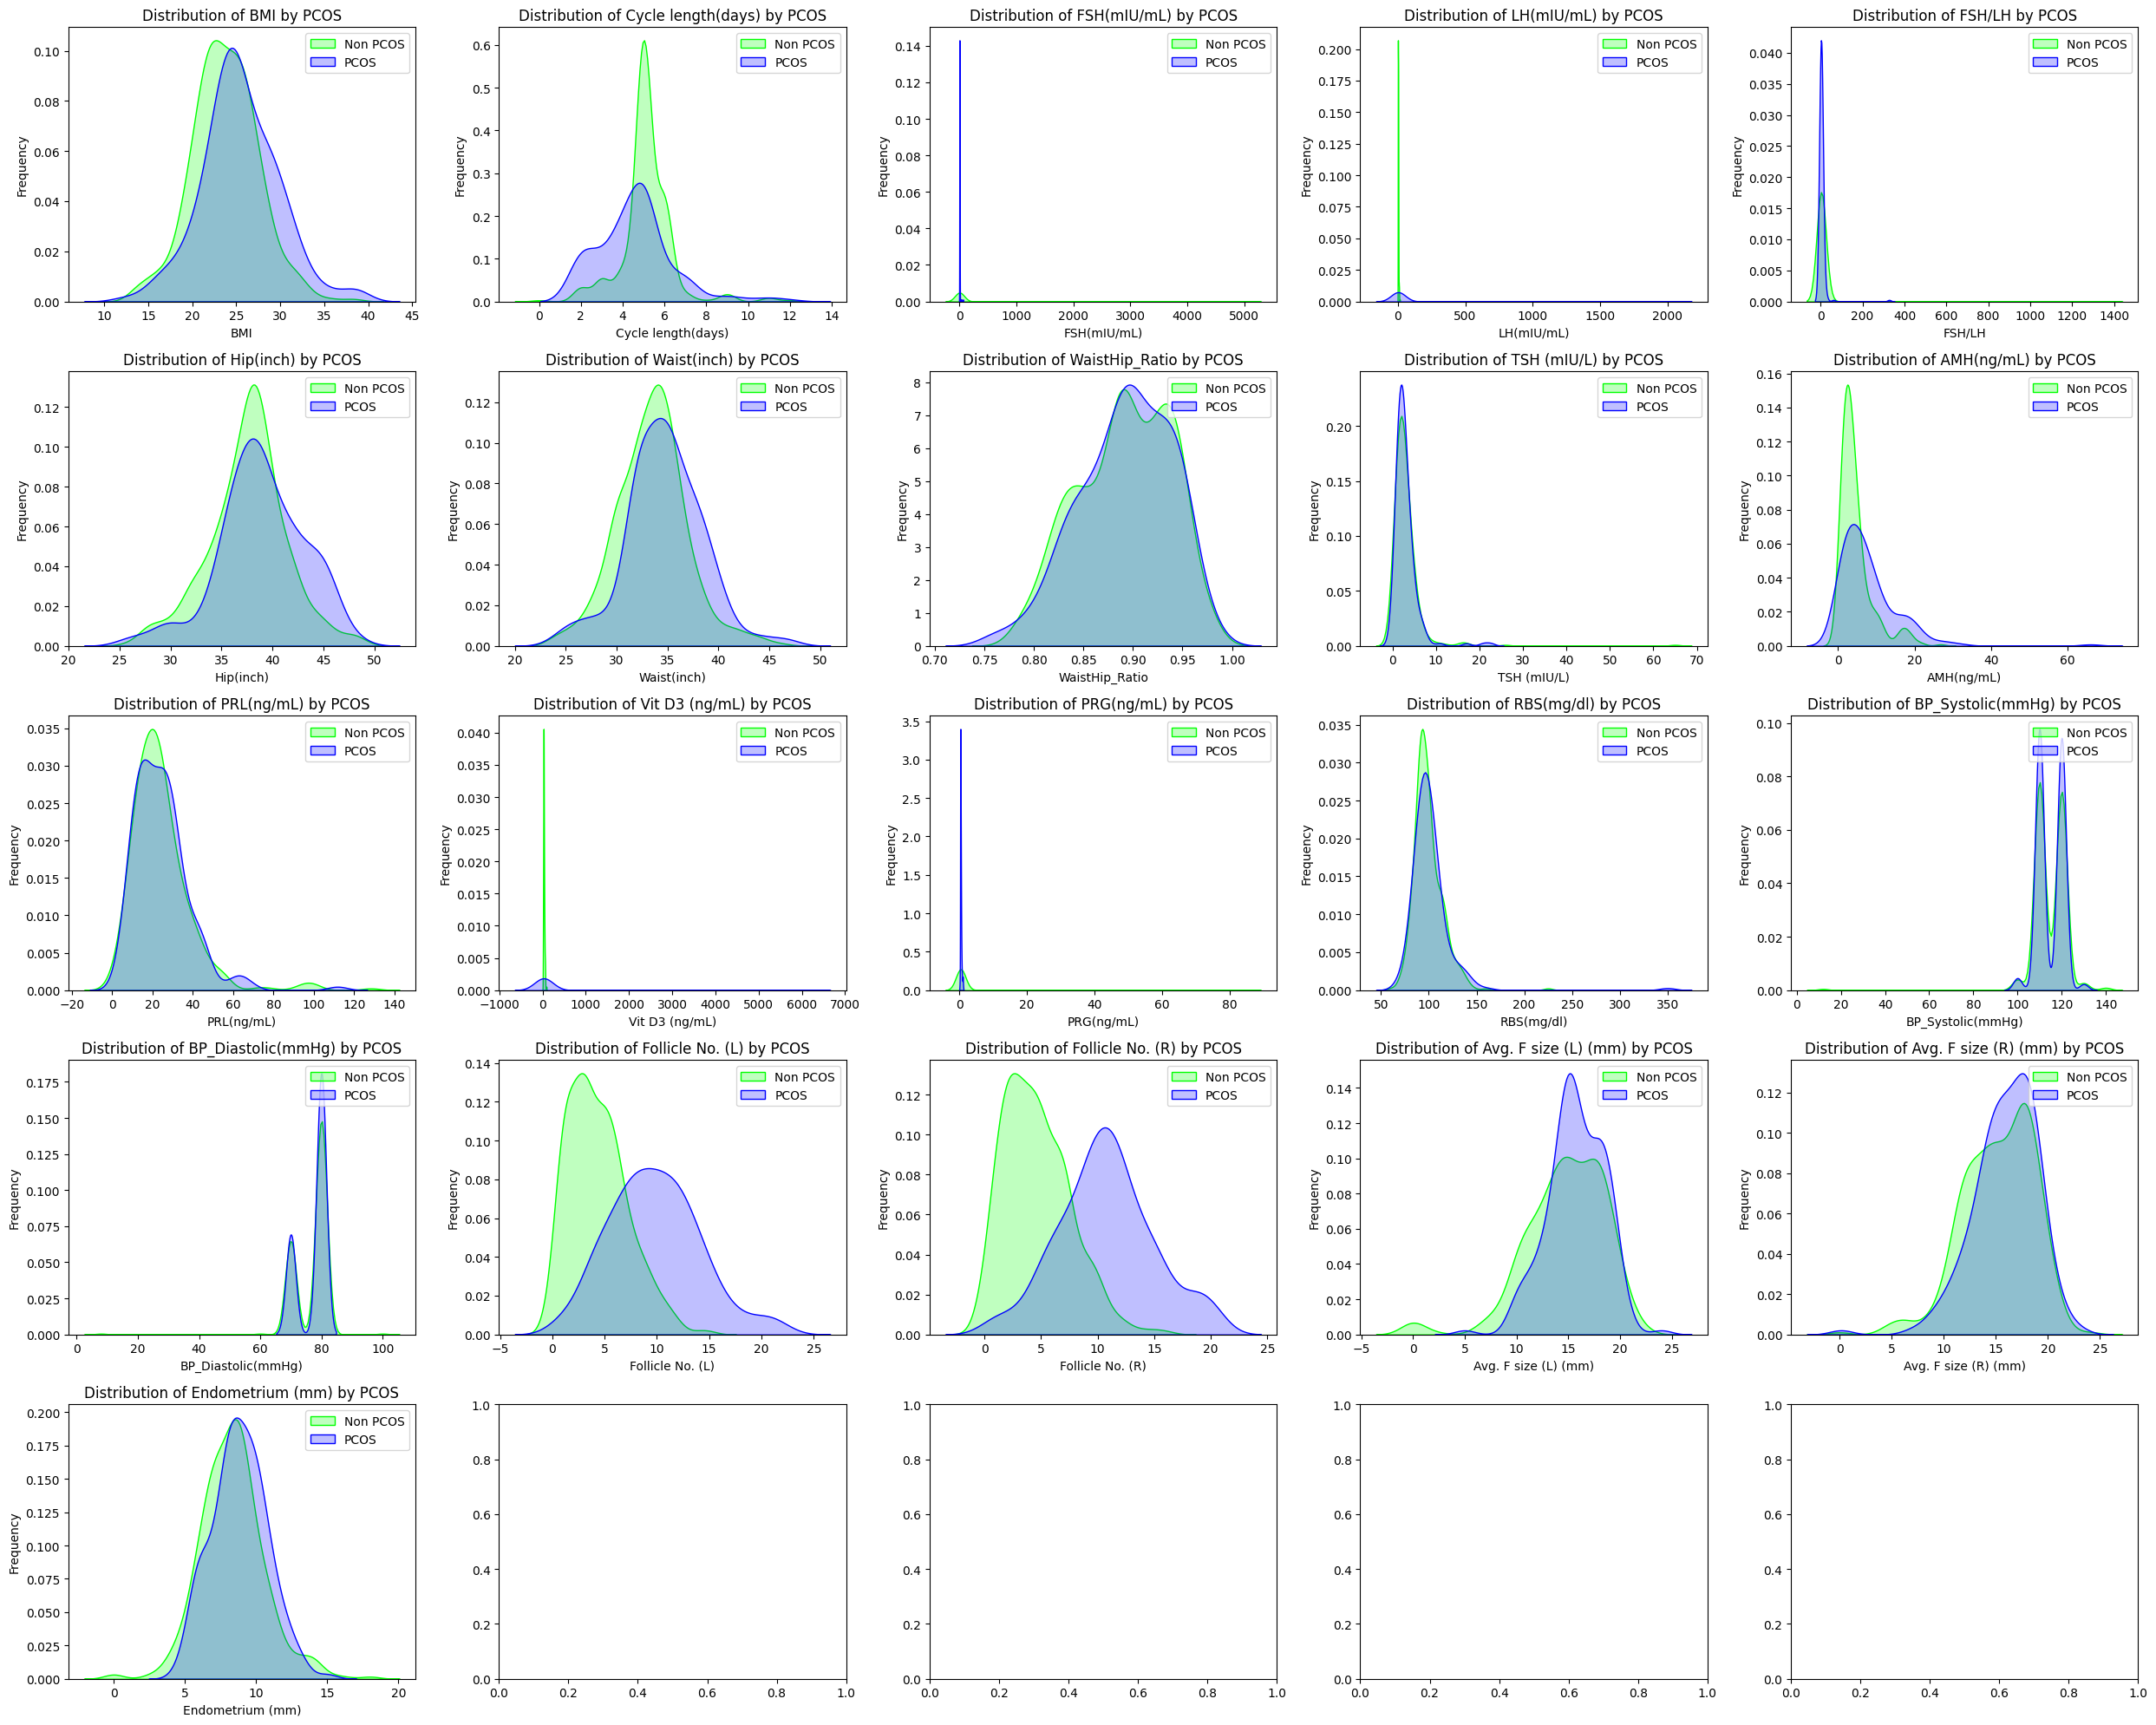

In [76]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 20))

for i in range(len(selected_columns)):
    row = i // 5  
    col = i % 5  

    sns.kdeplot(df[selected_columns[i]][(df['PCOS (Y/N)'] == 0)], color="Lime", shade=True, ax=axes[row, col])
    sns.kdeplot(df[selected_columns[i]][(df['PCOS (Y/N)'] == 1)], color="Blue", shade=True, ax=axes[row, col])

    axes[row, col].legend(["Non PCOS", "PCOS"], loc='upper right')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xlabel(selected_columns[i])
    axes[row, col].set_title(f'Distribution of {selected_columns[i]} by PCOS')


plt.tight_layout()
plt.show()

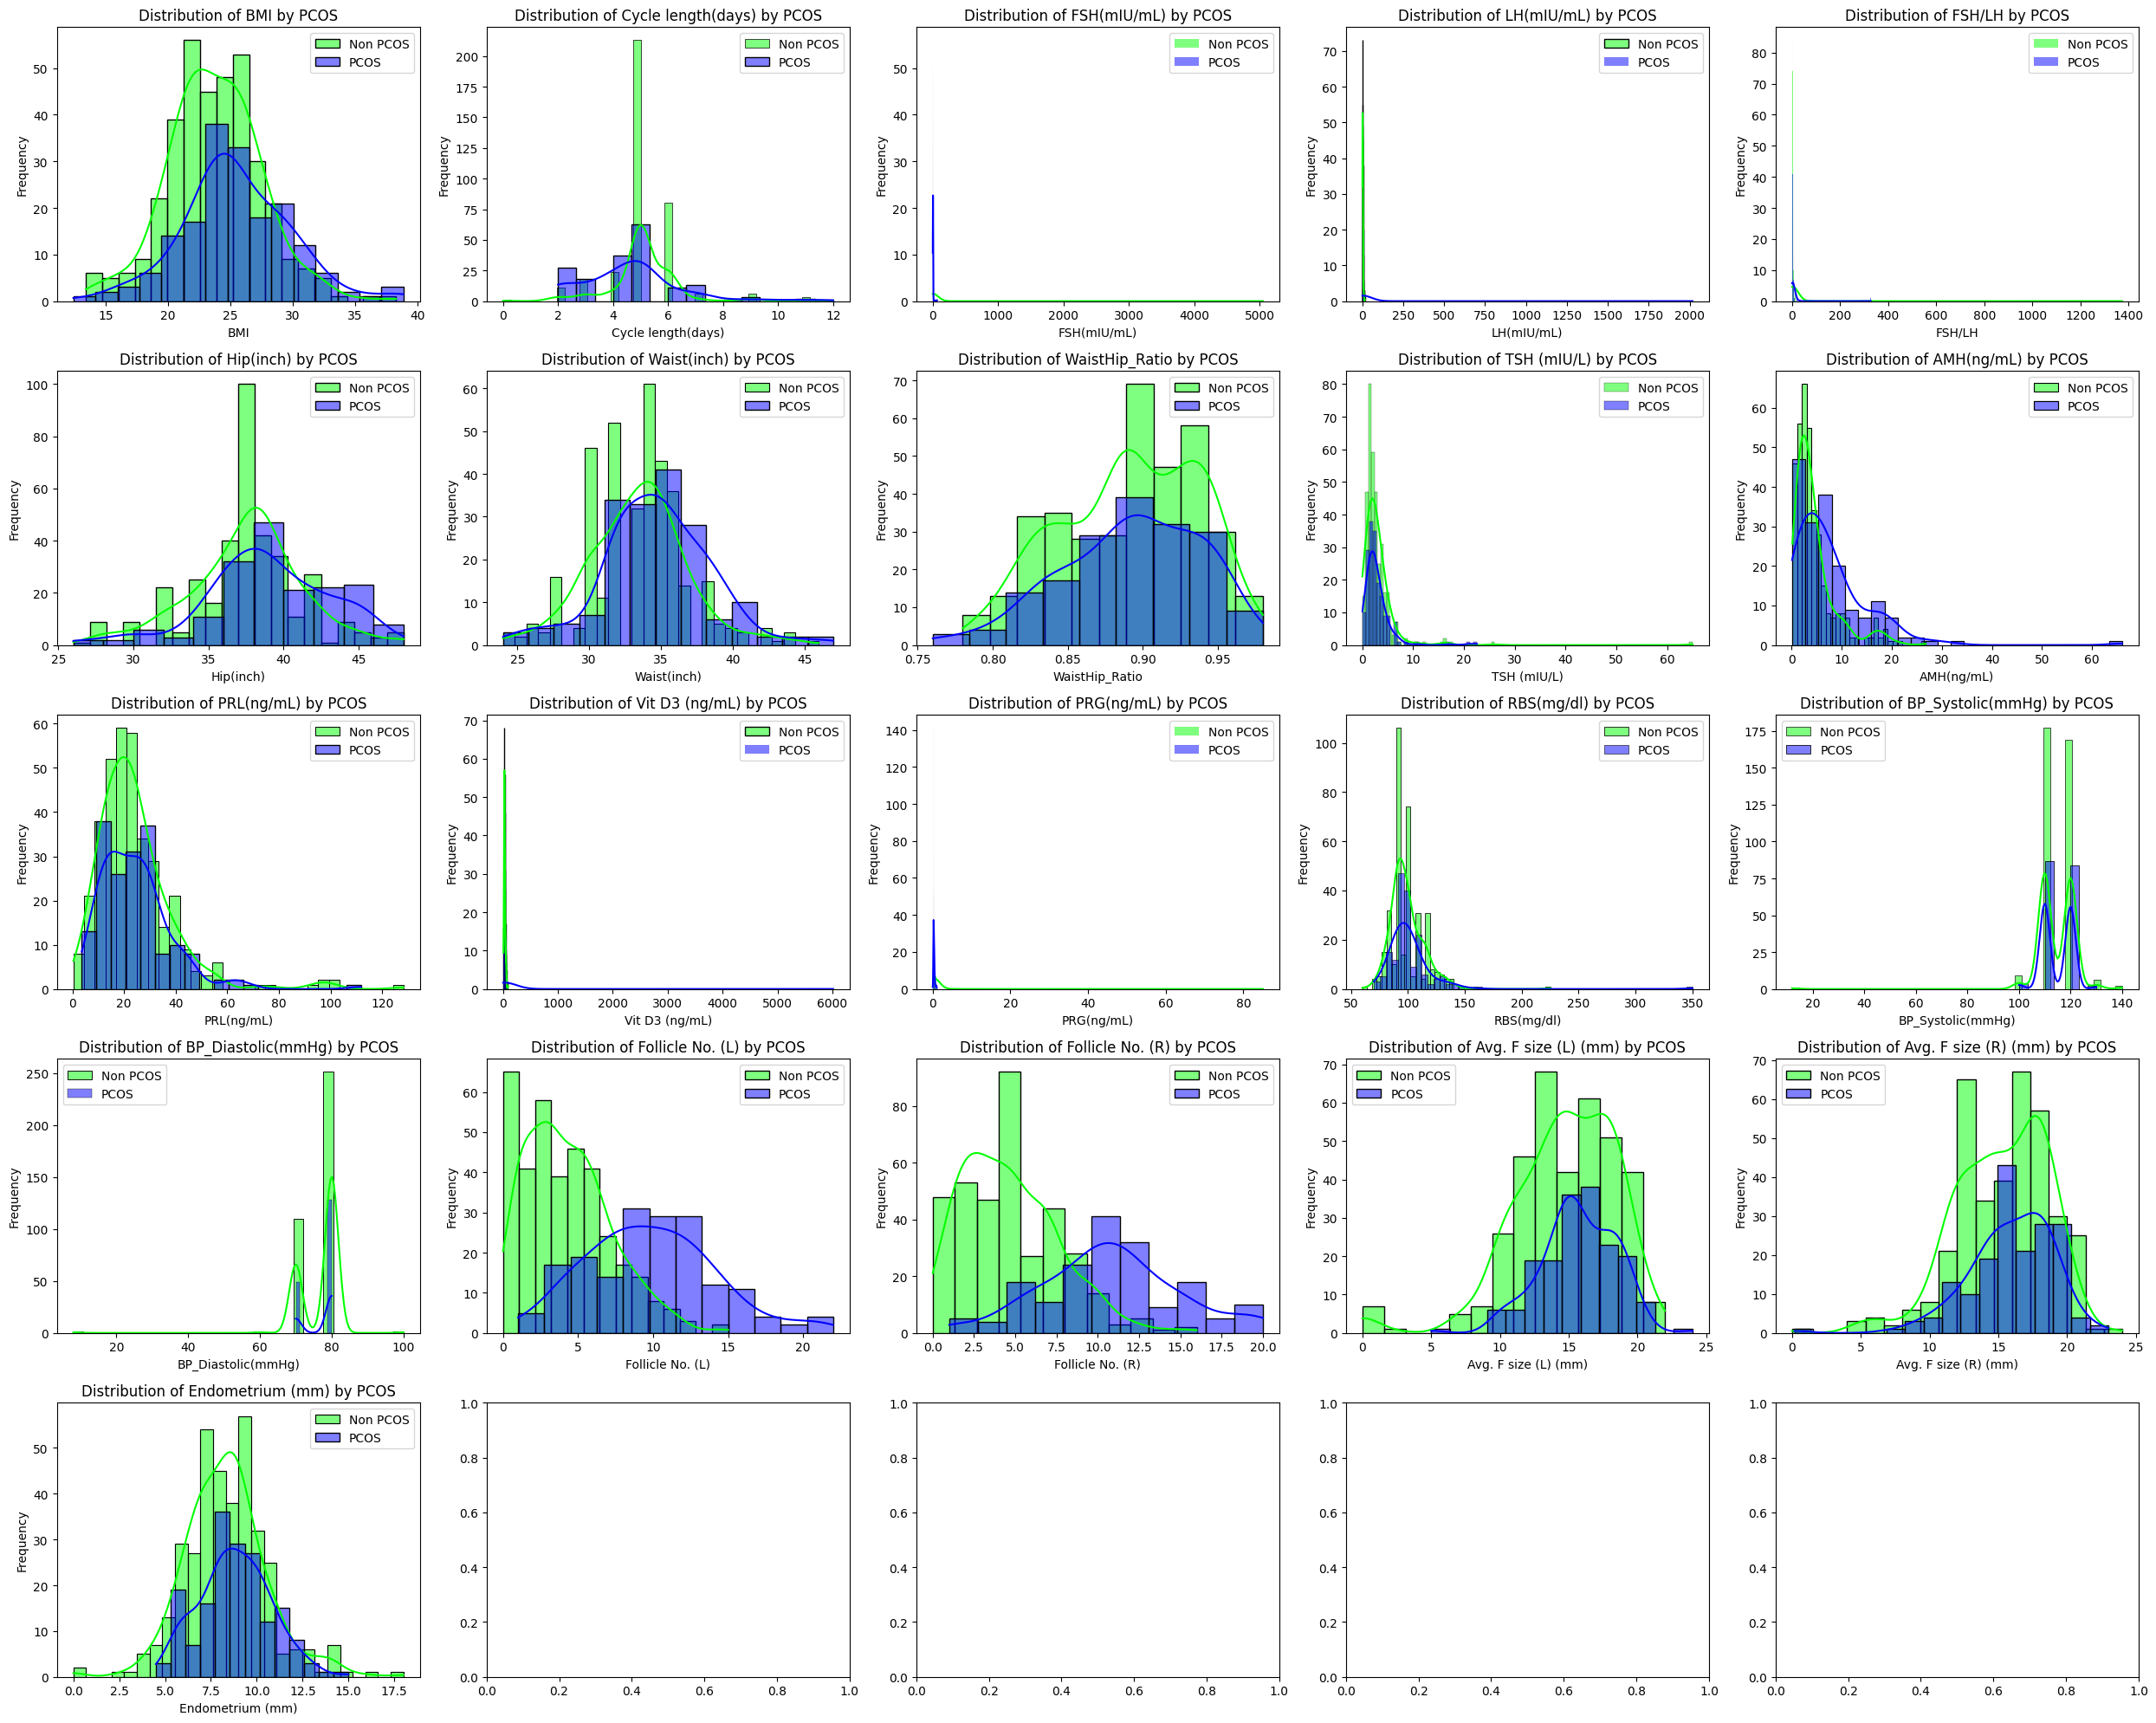

In [73]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 20))

for i in range(len(selected_columns)):
    row = i // 5
    col = i % 5   
    
    sns.histplot(df[selected_columns[i]][(df['PCOS (Y/N)'] == 0)], color="Lime", kde=True, ax=axes[row, col], label="Non PCOS")
    sns.histplot(df[selected_columns[i]][(df['PCOS (Y/N)'] == 1)], color="Blue", kde=True, ax=axes[row, col], label="PCOS")
    
    axes[row, col].legend()
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xlabel(selected_columns[i])
    axes[row, col].set_title(f'Distribution of {selected_columns[i]} by PCOS')


plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

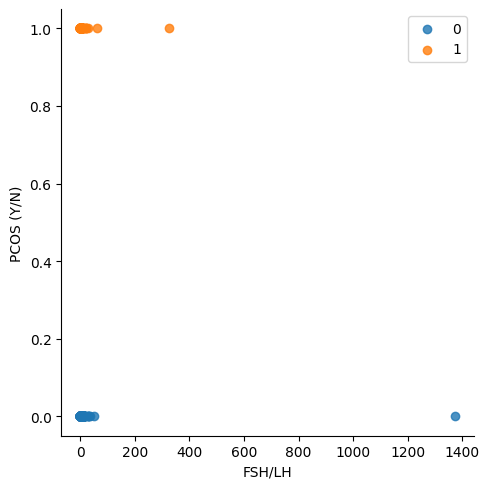

In [61]:
plt.figure(figsize=(5,5))
sns.lmplot(x="FSH/LH", y="PCOS (Y/N)", data=df, fit_reg=False, hue='PCOS (Y/N)', legend=False)
plt.legend(loc='upper right')
plt.show()

### Normalde FSH/LH oranı PCOS hastalarında yüksek çıkmaktadır.
# Ama burada 1300 lerde çıkan hasta PCOS değilmiş.
# Bu durum tuhaf outlier olabilir. Ayrı ayrı FSH ve LH değerlerine bakalım

Text(0.5, 1.0, 'Distribution of FSH by PCOS')

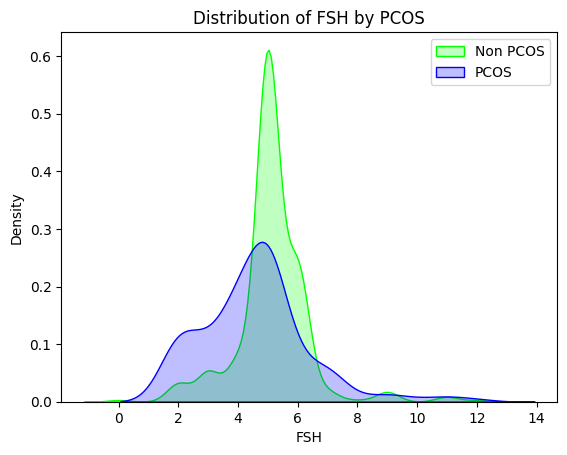

In [62]:
ax = sns.kdeplot(df["Cycle length(days)"][(df['PCOS (Y/N)'] == 0)], color="Lime", shade = True)
ax = sns.kdeplot(df["Cycle length(days)"][(df['PCOS (Y/N)'] == 1)], ax =ax, color="Blue", shade= True)
ax.legend(["Non PCOS","PCOS"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('FSH')
ax.set_title('Distribution of FSH by PCOS')

In [63]:
df[df["FSH/LH"] == 1372.830] # FSH: 5052.0 LH: 3.68

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
329           0         29         53.0       161.0  20.4           15   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
329               72                18      10.2           2   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
329                   6                    5.0              1   

     No. of abortions  I beta-HCG(mIU/mL)  II beta-HCG(mIU/mL)  FSH(mIU/mL)  \
329                 0               900.6                900.6       5052.0   

     LH(mIU/mL)   FSH/LH  Hip(inch)  Waist(inch)  Waist:Hip Ratio  \
329        3.68  1372.83         38           35             0.92   

     TSH (mIU/L)  AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  \
329         0.83         3.5       30.58            28.6         0.3   

     RBS(mg/dl)  Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  \
329       108.0                 0                 0                     0   

     Hair loss(Y/N)  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  \
329               1             1              1.0                  0   

     BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
329                  110                    80                 6   

     Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
329                 4                  16.0                  17.0   

     Endometrium (mm)  
329               6.0

In [66]:
df.shape

(541, 42)

In [65]:
df[df.index == 329]

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  \
329           0         29         53.0       161.0  20.4           15   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
329               72                18      10.2           2   

     Cycle length(days)  Marriage Status (Yrs)  Pregnant(Y/N)  \
329                   6                    5.0              1   

     No. of abortions  I beta-HCG(mIU/mL)  II beta-HCG(mIU/mL)  FSH(mIU/mL)  \
329                 0               900.6                900.6       5052.0   

     LH(mIU/mL)   FSH/LH  Hip(inch)  Waist(inch)  Waist:Hip Ratio  \
329        3.68  1372.83         38           35             0.92   

     TSH (mIU/L)  AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  \
329         0.83         3.5       30.58            28.6         0.3   

     RBS(mg/dl)  Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  \
329       108.0                 0                 0                     0   

     Hair loss(Y/N)  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  \
329               1             1              1.0                  0   

     BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
329                  110                    80                 6   

     Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
329                 4                  16.0                  17.0   

     Endometrium (mm)  
329               6.0

In [71]:
df.drop(329, inplace=True);

In [72]:
df[df.index == 329]

Empty DataFrame
Columns: [PCOS (Y/N), Age (yrs), Weight (Kg), Height(Cm), BMI, Blood Group, Pulse rate(bpm), RR (breaths/min), Hb(g/dl), Cycle(R/I), Cycle length(days), Marriage Status (Yrs), Pregnant(Y/N), No. of abortions, I beta-HCG(mIU/mL), II beta-HCG(mIU/mL), FSH(mIU/mL), LH(mIU/mL), FSH/LH, Hip(inch), Waist(inch), Waist:Hip Ratio, TSH (mIU/L), AMH(ng/mL), PRL(ng/mL), Vit D3 (ng/mL), PRG(ng/mL), RBS(mg/dl), Weight gain(Y/N), hair growth(Y/N), Skin darkening (Y/N), Hair loss(Y/N), Pimples(Y/N), Fast food (Y/N), Reg.Exercise(Y/N), BP _Systolic (mmHg), BP _Diastolic (mmHg), Follicle No. (L), Follicle No. (R), Avg. F size (L) (mm), Avg. F size (R) (mm), Endometrium (mm)]
Index: []

In [96]:
df["FSH/LH"].describe()

count    540.000000
mean       4.375426
std       14.914263
min        0.000000
25%        1.417500
50%        2.165000
75%        3.945000
max      327.000000
Name: FSH/LH, dtype: float64

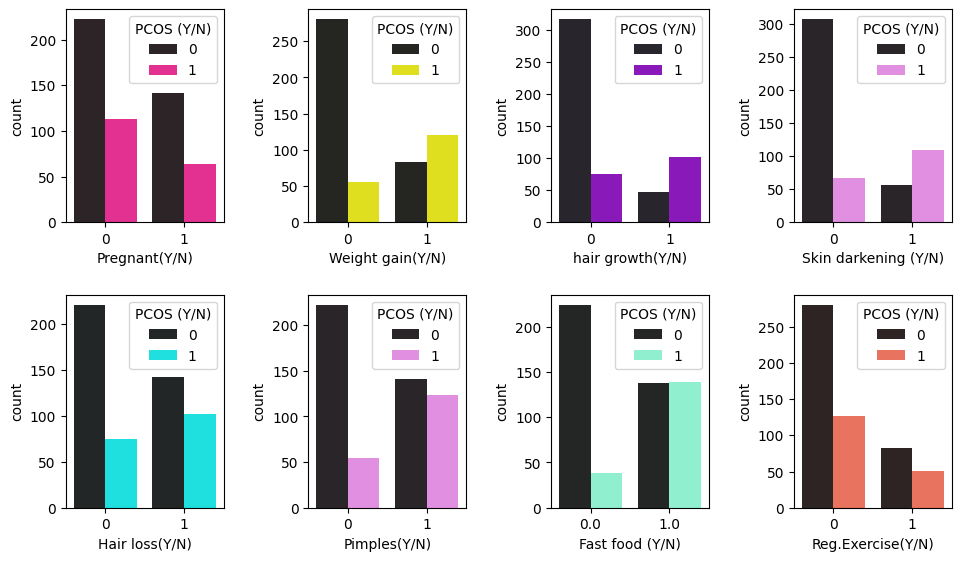

In [75]:
plt.figure(figsize=(10,6))
plt.subplot(2,4,1)
sns.countplot(df, x="Pregnant(Y/N)", hue="PCOS (Y/N)", color='deeppink')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,2)
sns.countplot(df, x="Weight gain(Y/N)", hue="PCOS (Y/N)", color='yellow')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,3)
sns.countplot(df, x="hair growth(Y/N)", hue="PCOS (Y/N)", color='darkviolet')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,4)
sns.countplot(df, x="Skin darkening (Y/N)", hue="PCOS (Y/N)", color='violet')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,5)
sns.countplot(df, x="Hair loss(Y/N)", hue="PCOS (Y/N)",  color='cyan')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,6)
sns.countplot(df, x="Pimples(Y/N)", hue="PCOS (Y/N)",  color='violet')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,7)
sns.countplot(df, x="Fast food (Y/N)", hue="PCOS (Y/N)",  color='aquamarine')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,8)
sns.countplot(df, x="Reg.Exercise(Y/N)", hue="PCOS (Y/N)", color='tomato')
plt.tight_layout(pad=2.1)


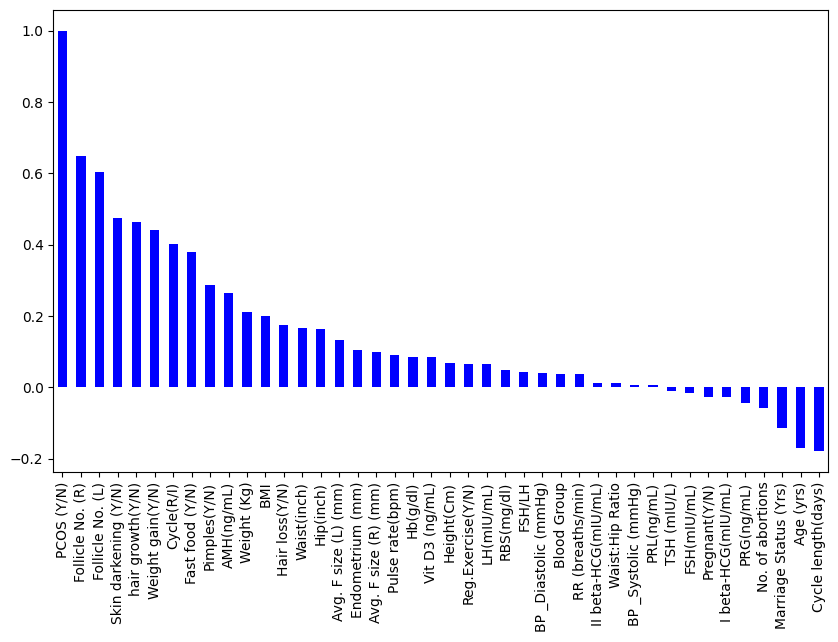

In [76]:
plt.figure(figsize=(10,6))
df.corr()['PCOS (Y/N)'].sort_values(ascending = False).plot(kind='bar', color= 'blue')
plt.xticks(rotation=90);

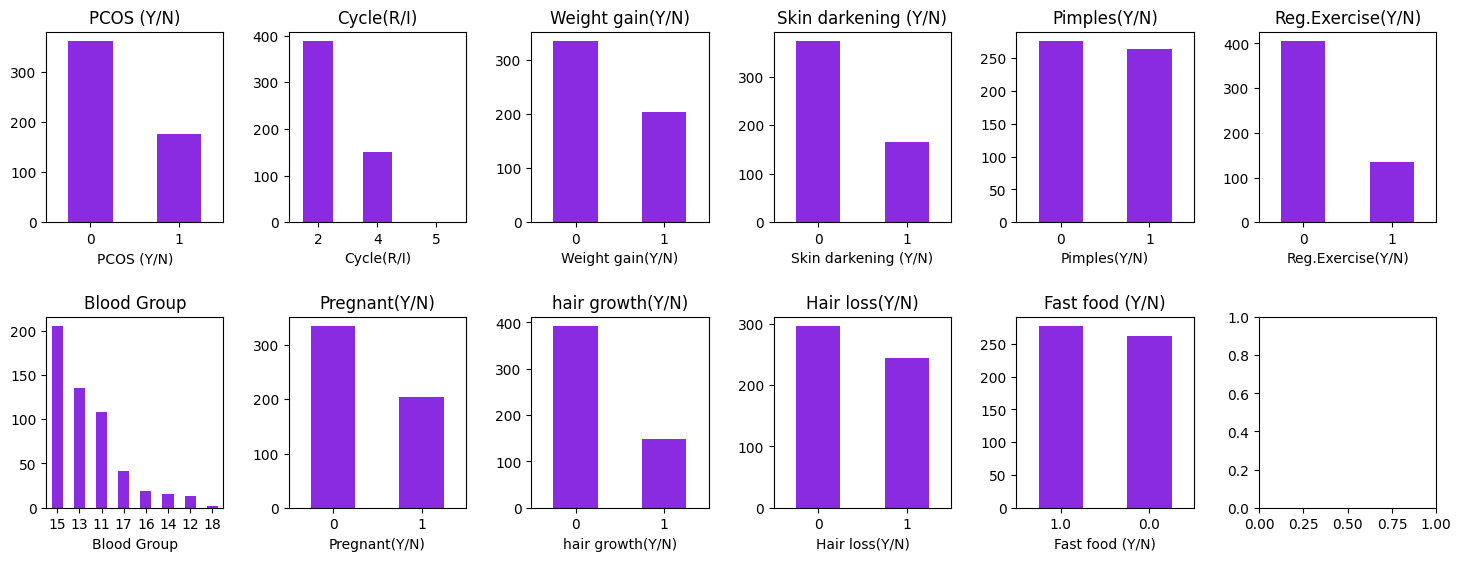

In [78]:
services = ['PCOS (Y/N)', 'Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
            'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

fig, axes = plt.subplots(nrows = 2, ncols = 6, figsize = (15,6))
for i, item in enumerate(services):
    if i < 2:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color='blueviolet')
    elif i >=2 and i < 4:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-2,1],rot = 0, color='blueviolet')
    elif i >=4 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color='blueviolet')
    elif i >=6 and i < 8:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-8,3],rot = 0, color='blueviolet')    
    elif i >=8 and i < 10:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-10,4],rot = 0, color='blueviolet')   
    elif i < 12:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-12,5],rot = 0, color='blueviolet') 
    ax.set_title(item)
    plt.tight_layout(pad=2.1)

Text(0.5, 1.0, 'Correlation Heatmap')

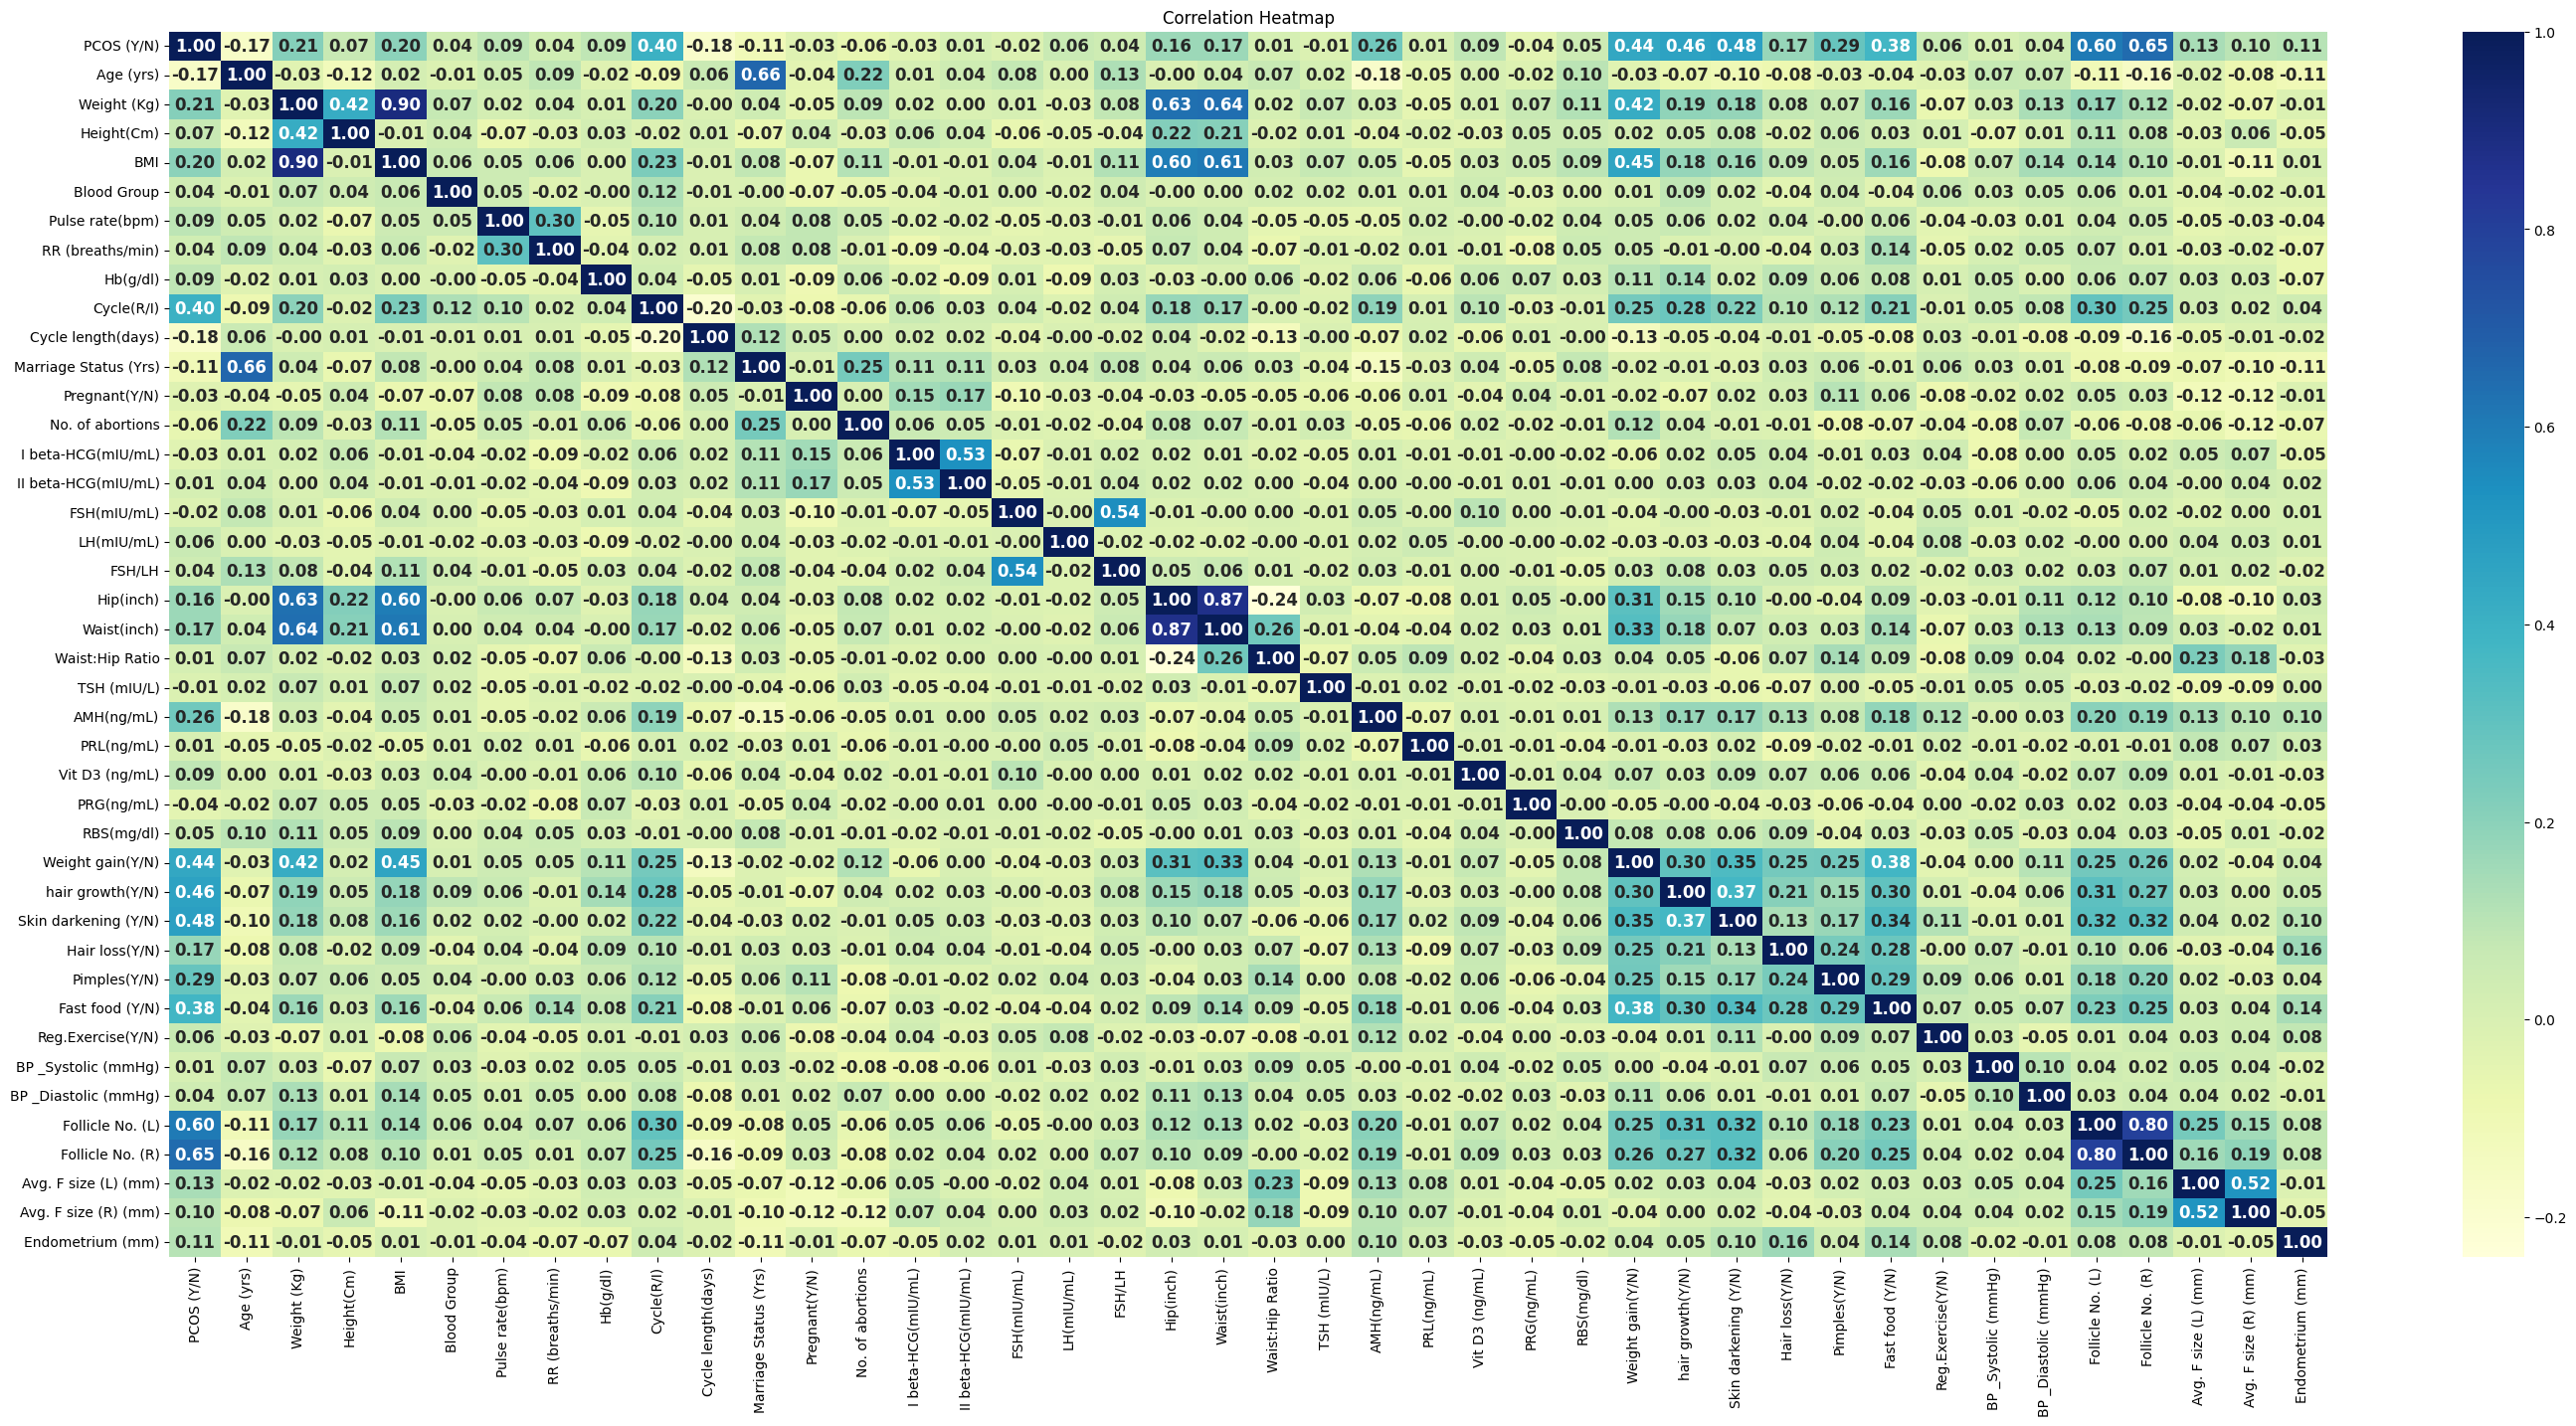

In [79]:
corr = df.corr()
plt.figure(figsize = (35,16))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu', fmt='.2f', annot_kws={'size': 12, 'fontweight': 'semibold'})
plt.title('Correlation Heatmap')

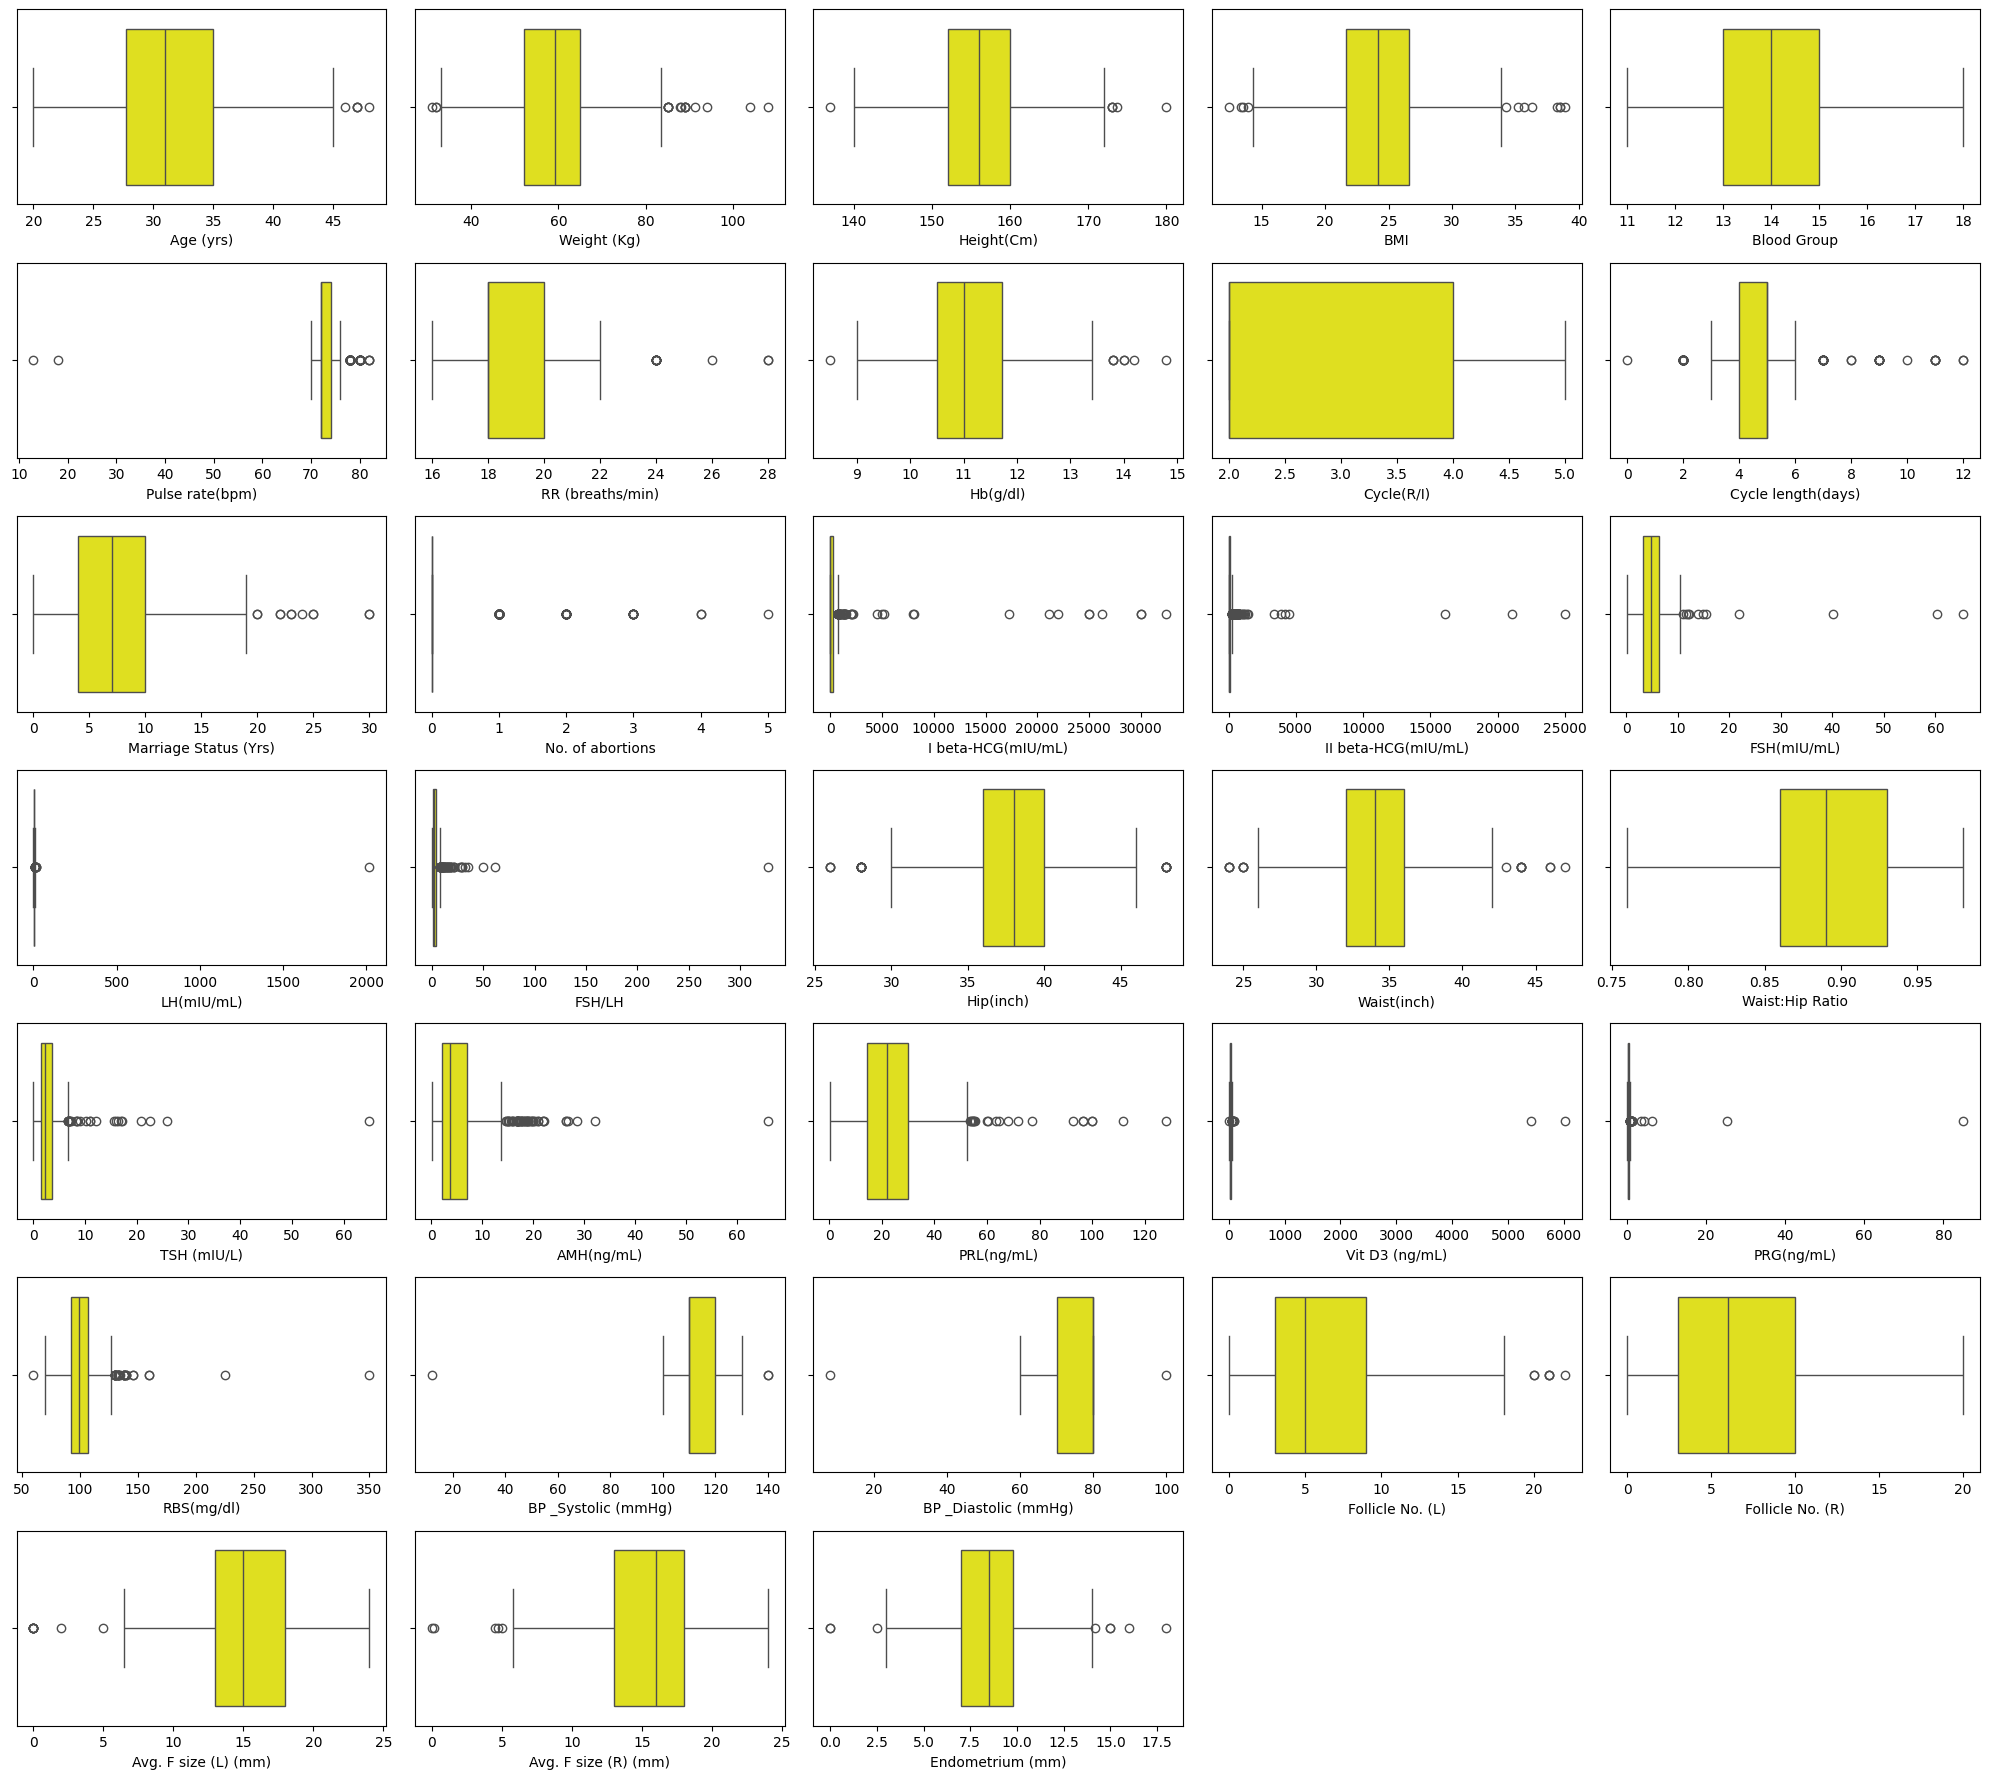

In [81]:
plt.figure(figsize=(20,20))
num = ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marriage Status (Yrs)', 'No. of abortions', 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 
       'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
num_df = df[num]
for num,col in enumerate(num_df.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(8, 5, num)
    sns.boxplot(num_df[col], orient="h", color='yellow')
    plt.tight_layout()